## HEDEF BU DOSYADAKI 39302 değerinden daha düşük hataya sahip model kurmak.
## Bunun için ne yapılabilir?
## Yeni değişkenler türebilebilir.
## Zaman değişkeni üzerinde değişiklikler yapılabilir.
## Farklı değişken dönüştürme yöntemleri denenebilir.
## Genel olarak en üst seviyeden ele alınan projeyi değişkenleri daha detaylı inceleyerek ve hatta isterseniz
## notebook'ta ele alarak, analiz ederek inceleyerek ilerleyebilirsiniz.

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [186]:
# train ve test setlerinin bir araya getirilmesi.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = train.append(test).reset_index()
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [167]:
df["SalePrice"].isnull().value_counts()

False    1460
True     1459
Name: SalePrice, dtype: int64

In [9]:
df.shape

(2919, 82)

## 2. EDA

## Categorical Variable Analyse

In [187]:

cat_cols = [col for col in df.columns if df[col].dtypes == 'O' ]
print('Kategorik Değişken Sayısı: ', len(cat_cols))

Kategorik Değişken Sayısı:  43


In [188]:

def cats_summary(data):
    var_count=0
    cat_names=[col for col in data.columns if len(data[col].unique()) <20]
    for col in cat_names:
        print(pd.DataFrame({col:data[col].value_counts(),"ratio":100*data[col].value_counts()/len(data)}), end="\n")
        sns.countplot(x=col, data=data)
        var_count+=1
        plt.show()
    print(f"{var_count} variables plotted")

     MSSubClass  ratio
20         1079 36.965
60          575 19.699
50          287  9.832
120         182  6.235
30          139  4.762
160         128  4.385
70          128  4.385
80          118  4.042
90          109  3.734
190          61  2.090
85           48  1.644
75           23  0.788
45           18  0.617
180          17  0.582
40            6  0.206
150           1  0.034


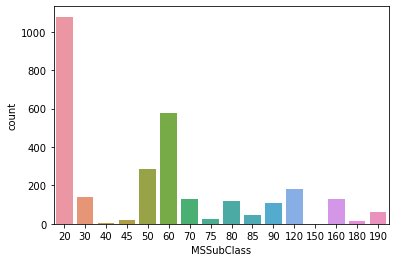

         MSZoning  ratio
RL           2265 77.595
RM            460 15.759
FV            139  4.762
RH             26  0.891
C (all)        25  0.856


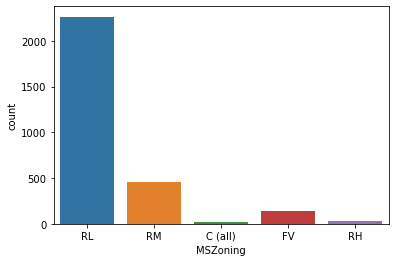

      Street  ratio
Pave    2907 99.589
Grvl      12  0.411


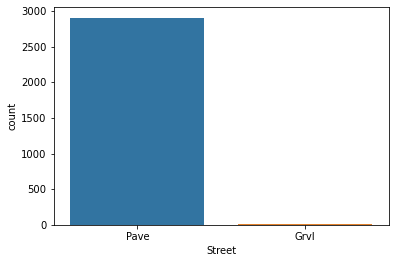

      Alley  ratio
Grvl    120  4.111
Pave     78  2.672


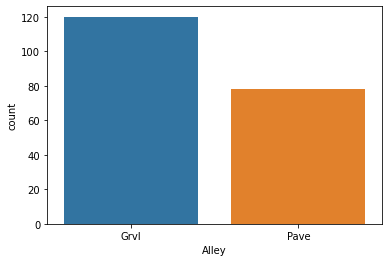

     LotShape  ratio
Reg      1859 63.686
IR1       968 33.162
IR2        76  2.604
IR3        16  0.548


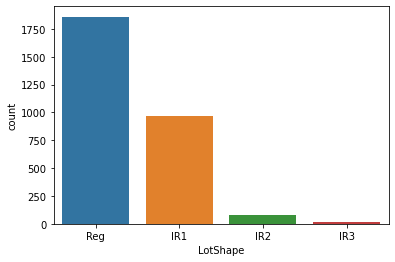

     LandContour  ratio
Lvl         2622 89.825
HLS          120  4.111
Bnk          117  4.008
Low           60  2.055


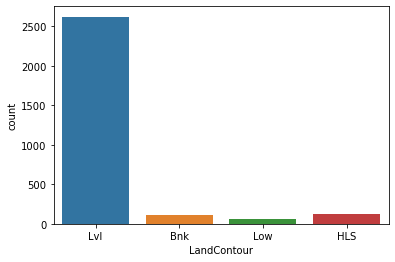

        Utilities  ratio
AllPub       2916 99.897
NoSeWa          1  0.034


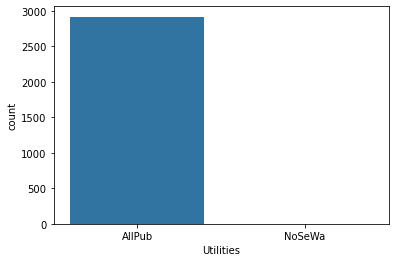

         LotConfig  ratio
Inside        2133 73.073
Corner         511 17.506
CulDSac        176  6.029
FR2             85  2.912
FR3             14  0.480


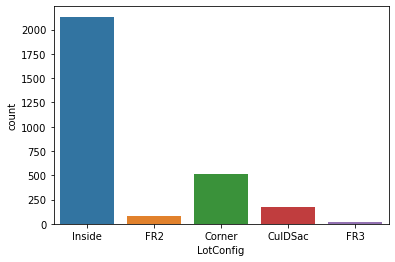

     LandSlope  ratio
Gtl       2778 95.170
Mod        125  4.282
Sev         16  0.548


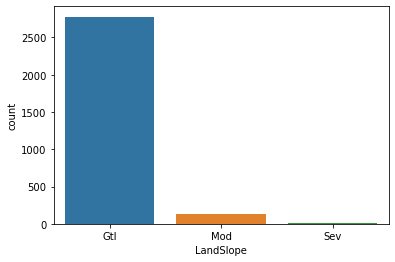

        Condition1  ratio
Norm          2511 86.023
Feedr          164  5.618
Artery          92  3.152
RRAn            50  1.713
PosN            39  1.336
RRAe            28  0.959
PosA            20  0.685
RRNn             9  0.308
RRNe             6  0.206


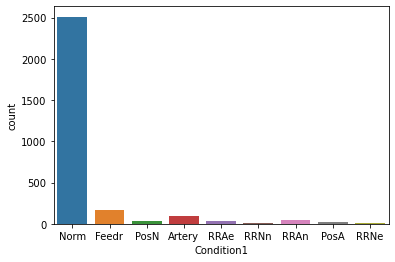

        Condition2  ratio
Norm          2889 98.972
Feedr           13  0.445
Artery           5  0.171
PosA             4  0.137
PosN             4  0.137
RRNn             2  0.069
RRAn             1  0.034
RRAe             1  0.034


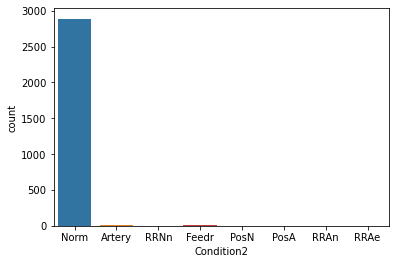

        BldgType  ratio
1Fam        2425 83.076
TwnhsE       227  7.777
Duplex       109  3.734
Twnhs         96  3.289
2fmCon        62  2.124


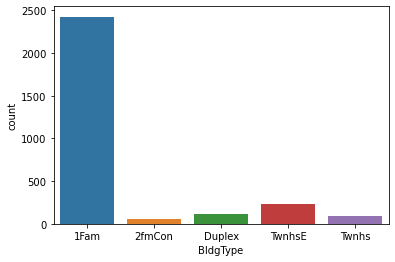

        HouseStyle  ratio
1Story        1471 50.394
2Story         872 29.873
1.5Fin         314 10.757
SLvl           128  4.385
SFoyer          83  2.843
2.5Unf          24  0.822
1.5Unf          19  0.651
2.5Fin           8  0.274


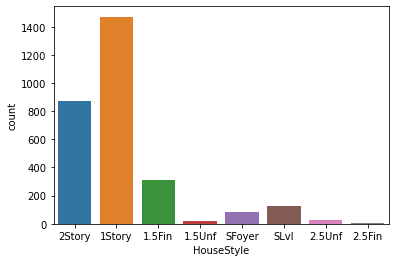

    OverallQual  ratio
5           825 28.263
6           731 25.043
7           600 20.555
8           342 11.716
4           226  7.742
9           107  3.666
3            40  1.370
10           31  1.062
2            13  0.445
1             4  0.137


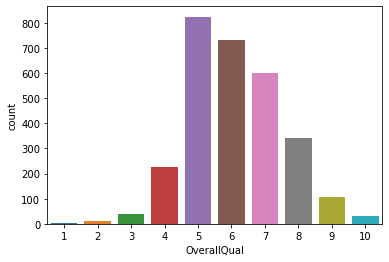

   OverallCond  ratio
5         1645 56.355
6          531 18.191
7          390 13.361
8          144  4.933
4          101  3.460
3           50  1.713
9           41  1.405
2           10  0.343
1            7  0.240


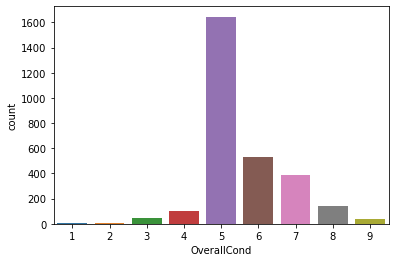

         RoofStyle  ratio
Gable         2310 79.137
Hip            551 18.876
Gambrel         22  0.754
Flat            20  0.685
Mansard         11  0.377
Shed             5  0.171


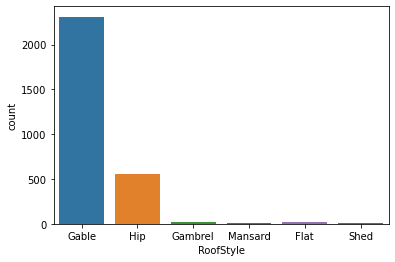

         RoofMatl  ratio
CompShg      2876 98.527
Tar&Grv        23  0.788
WdShake         9  0.308
WdShngl         7  0.240
Membran         1  0.034
ClyTile         1  0.034
Roll            1  0.034
Metal           1  0.034


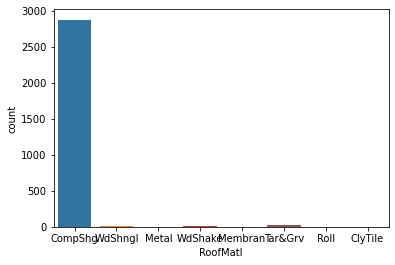

         Exterior1st  ratio
VinylSd         1025 35.115
MetalSd          450 15.416
HdBoard          442 15.142
Wd Sdng          411 14.080
Plywood          221  7.571
CemntBd          126  4.317
BrkFace           87  2.980
WdShing           56  1.918
AsbShng           44  1.507
Stucco            43  1.473
BrkComm            6  0.206
CBlock             2  0.069
AsphShn            2  0.069
Stone              2  0.069
ImStucc            1  0.034


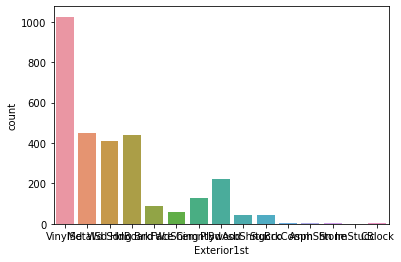

         Exterior2nd  ratio
VinylSd         1014 34.738
MetalSd          447 15.313
HdBoard          406 13.909
Wd Sdng          391 13.395
Plywood          270  9.250
CmentBd          126  4.317
Wd Shng           81  2.775
BrkFace           47  1.610
Stucco            47  1.610
AsbShng           38  1.302
Brk Cmn           22  0.754
ImStucc           15  0.514
Stone              6  0.206
AsphShn            4  0.137
CBlock             3  0.103
Other              1  0.034


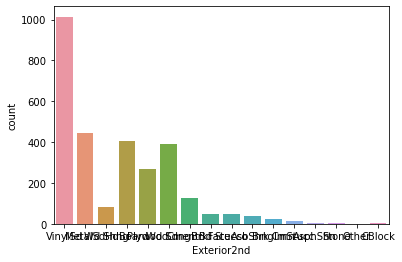

         MasVnrType  ratio
None           1742 59.678
BrkFace         879 30.113
Stone           249  8.530
BrkCmn           25  0.856


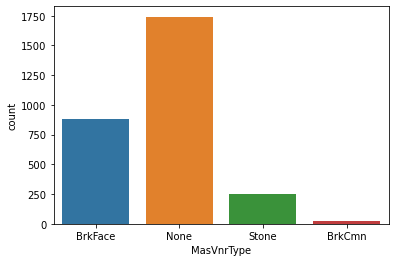

    ExterQual  ratio
TA       1798 61.596
Gd        979 33.539
Ex        107  3.666
Fa         35  1.199


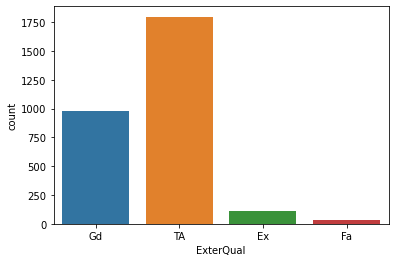

    ExterCond  ratio
TA       2538 86.948
Gd        299 10.243
Fa         67  2.295
Ex         12  0.411
Po          3  0.103


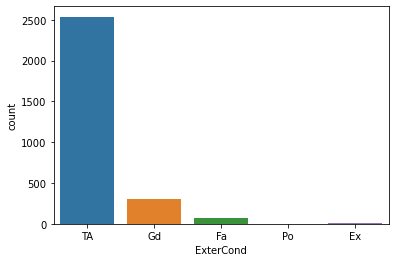

        Foundation  ratio
PConc         1308 44.810
CBlock        1235 42.309
BrkTil         311 10.654
Slab            49  1.679
Stone           11  0.377
Wood             5  0.171


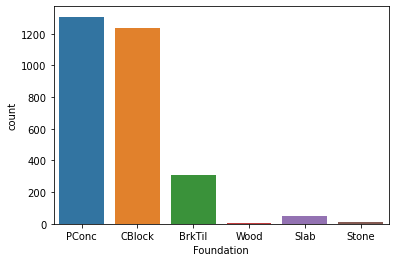

    BsmtQual  ratio
TA      1283 43.953
Gd      1209 41.418
Ex       258  8.839
Fa        88  3.015


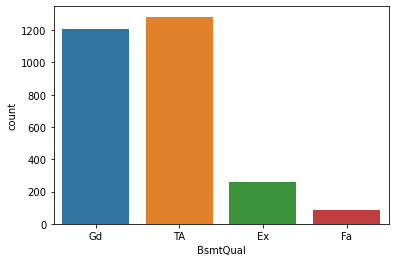

    BsmtCond  ratio
TA      2606 89.277
Gd       122  4.180
Fa       104  3.563
Po         5  0.171


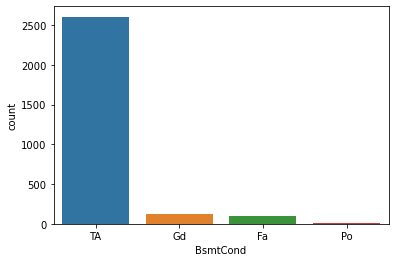

    BsmtExposure  ratio
No          1904 65.228
Av           418 14.320
Gd           276  9.455
Mn           239  8.188


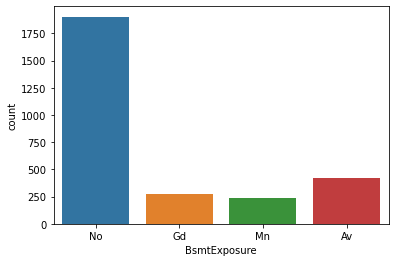

     BsmtFinType1  ratio
Unf           851 29.154
GLQ           849 29.085
ALQ           429 14.697
Rec           288  9.866
BLQ           269  9.215
LwQ           154  5.276


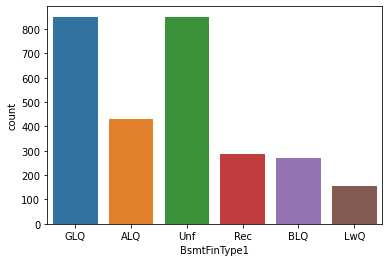

     BsmtFinType2  ratio
Unf          2493 85.406
Rec           105  3.597
LwQ            87  2.980
BLQ            68  2.330
ALQ            52  1.781
GLQ            34  1.165


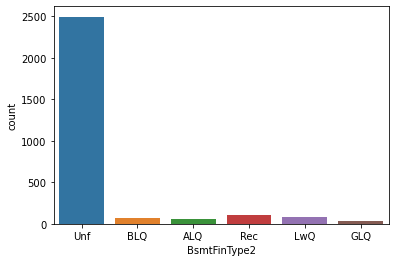

       Heating  ratio
GasA      2874 98.458
GasW        27  0.925
Grav         9  0.308
Wall         6  0.206
OthW         2  0.069
Floor        1  0.034


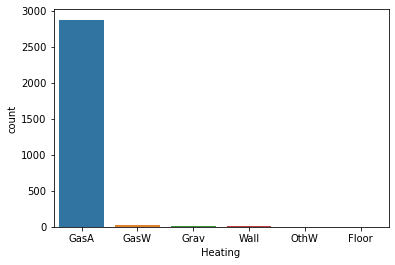

    HeatingQC  ratio
Ex       1493 51.148
TA        857 29.359
Gd        474 16.238
Fa         92  3.152
Po          3  0.103


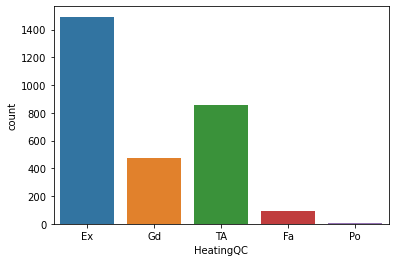

   CentralAir  ratio
Y        2723 93.285
N         196  6.715


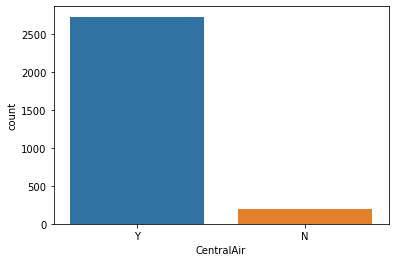

       Electrical  ratio
SBrkr        2671 91.504
FuseA         188  6.441
FuseF          50  1.713
FuseP           8  0.274
Mix             1  0.034


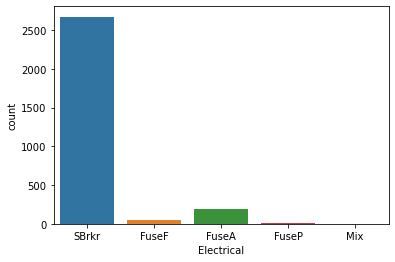

       BsmtFullBath  ratio
0.000          1705 58.410
1.000          1172 40.151
2.000            38  1.302
3.000             2  0.069


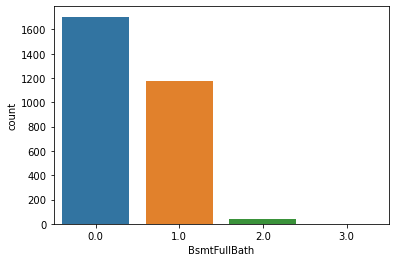

       BsmtHalfBath  ratio
0.000          2742 93.936
1.000           171  5.858
2.000             4  0.137


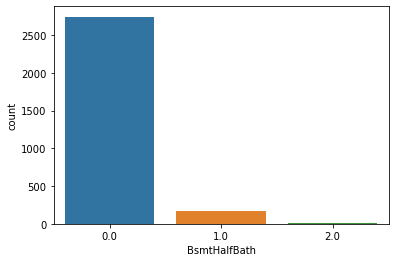

   FullBath  ratio
2      1530 52.415
1      1309 44.844
3        64  2.193
0        12  0.411
4         4  0.137


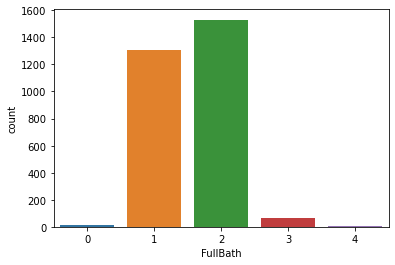

   HalfBath  ratio
0      1834 62.830
1      1060 36.314
2        25  0.856


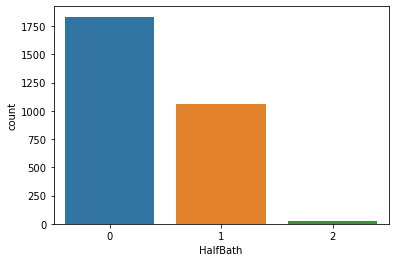

   BedroomAbvGr  ratio
3          1596 54.676
2           742 25.420
4           400 13.703
1           103  3.529
5            48  1.644
6            21  0.719
0             8  0.274
8             1  0.034


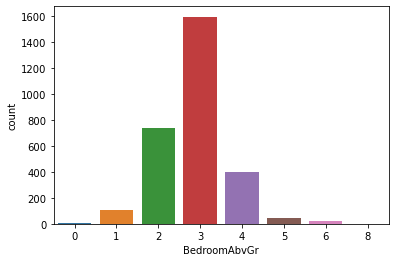

   KitchenAbvGr  ratio
1          2785 95.409
2           129  4.419
0             3  0.103
3             2  0.069


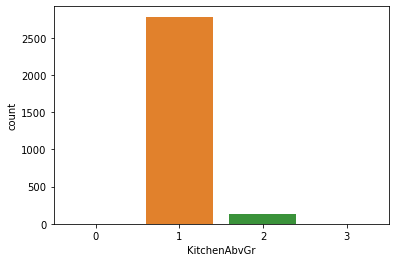

    KitchenQual  ratio
TA         1492 51.113
Gd         1151 39.431
Ex          205  7.023
Fa           70  2.398


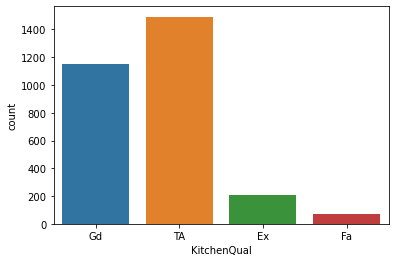

    TotRmsAbvGrd  ratio
6            844 28.914
7            649 22.234
5            583 19.973
8            347 11.888
4            196  6.715
9            143  4.899
10            80  2.741
11            32  1.096
3             25  0.856
12            16  0.548
15             1  0.034
13             1  0.034
14             1  0.034
2              1  0.034


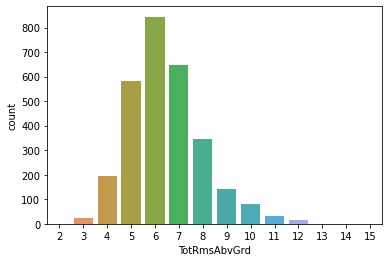

      Functional  ratio
Typ         2717 93.080
Min2          70  2.398
Min1          65  2.227
Mod           35  1.199
Maj1          19  0.651
Maj2           9  0.308
Sev            2  0.069


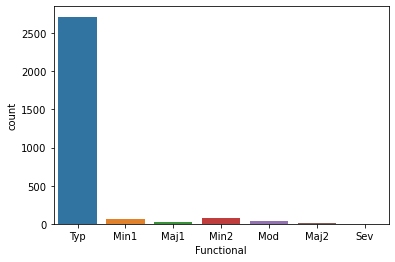

   Fireplaces  ratio
0        1420 48.647
1        1268 43.440
2         219  7.503
3          11  0.377
4           1  0.034


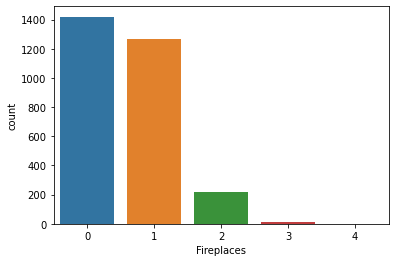

    FireplaceQu  ratio
Gd          744 25.488
TA          592 20.281
Fa           74  2.535
Po           46  1.576
Ex           43  1.473


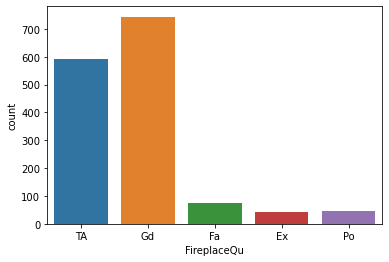

         GarageType  ratio
Attchd         1723 59.027
Detchd          779 26.687
BuiltIn         186  6.372
Basment          36  1.233
2Types           23  0.788
CarPort          15  0.514


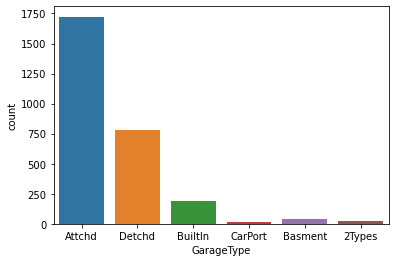

     GarageFinish  ratio
Unf          1230 42.138
RFn           811 27.783
Fin           719 24.632


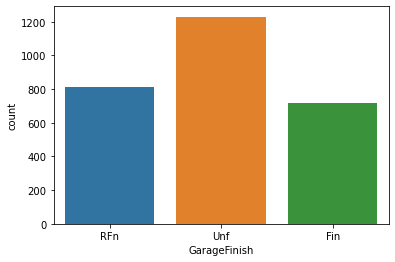

       GarageCars  ratio
2.000        1594 54.608
1.000         776 26.584
3.000         374 12.813
0.000         157  5.379
4.000          16  0.548
5.000           1  0.034


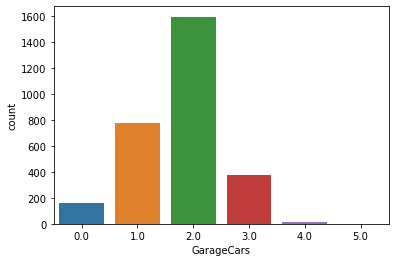

    GarageQual  ratio
TA        2604 89.209
Fa         124  4.248
Gd          24  0.822
Po           5  0.171
Ex           3  0.103


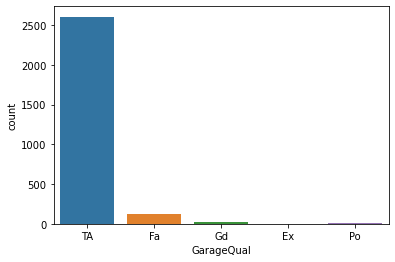

    GarageCond  ratio
TA        2654 90.922
Fa          74  2.535
Gd          15  0.514
Po          14  0.480
Ex           3  0.103


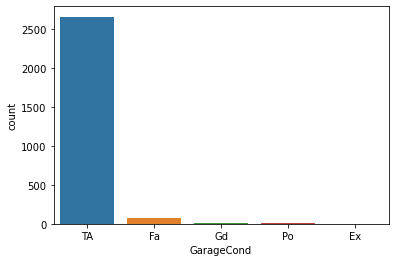

   PavedDrive  ratio
Y        2641 90.476
N         216  7.400
P          62  2.124


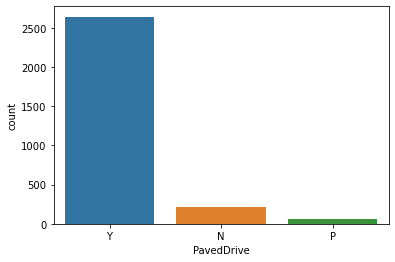

     PoolArea  ratio
0        2906 99.555
561         1  0.034
555         1  0.034
519         1  0.034
800         1  0.034
738         1  0.034
648         1  0.034
576         1  0.034
512         1  0.034
480         1  0.034
444         1  0.034
368         1  0.034
228         1  0.034
144         1  0.034


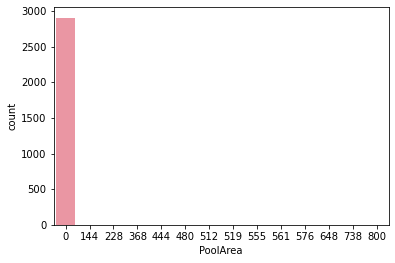

    PoolQC  ratio
Ex       4  0.137
Gd       4  0.137
Fa       2  0.069


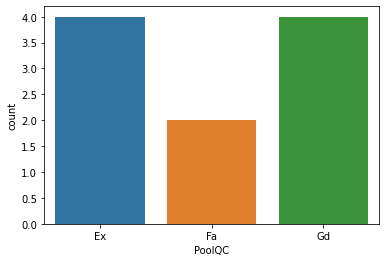

       Fence  ratio
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411


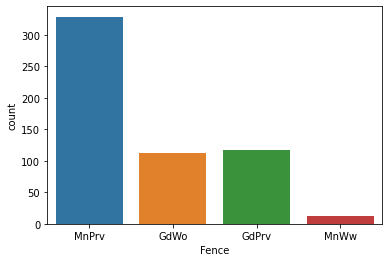

      MiscFeature  ratio
Shed           95  3.255
Gar2            5  0.171
Othr            4  0.137
TenC            1  0.034


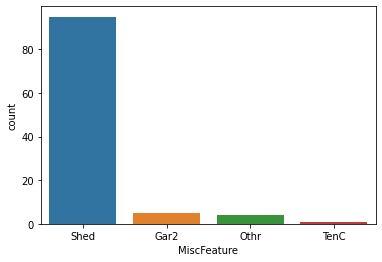

    MoSold  ratio
6      503 17.232
7      446 15.279
5      394 13.498
4      279  9.558
8      233  7.982
3      232  7.948
10     173  5.927
9      158  5.413
11     142  4.865
2      133  4.556
1      122  4.180
12     104  3.563


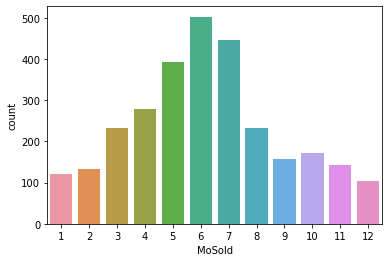

      YrSold  ratio
2007     692 23.707
2009     647 22.165
2008     622 21.309
2006     619 21.206
2010     339 11.614


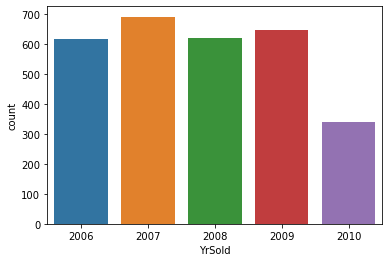

       SaleType  ratio
WD         2525 86.502
New         239  8.188
COD          87  2.980
ConLD        26  0.891
CWD          12  0.411
ConLI         9  0.308
ConLw         8  0.274
Oth           7  0.240
Con           5  0.171


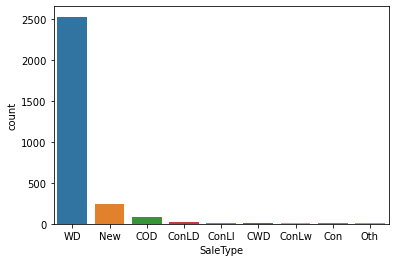

         SaleCondition  ratio
Normal            2402 82.288
Partial            245  8.393
Abnorml            190  6.509
Family              46  1.576
Alloca              24  0.822
AdjLand             12  0.411


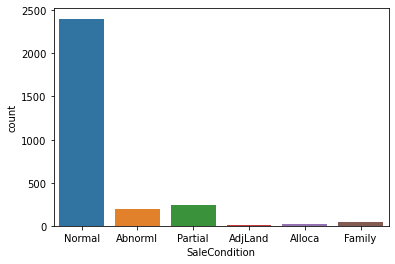

57 variables plotted


In [48]:
cats_summary(df)

In [189]:
def cat_summary(data, categorical_cols, target, number_of_classes=20):
    var_count = 0
    vars_more_classes = []
    for var in categorical_cols:
        if len(df[var].value_counts()) <= number_of_classes:  # sınıf sayısına göre seç
            print(pd.DataFrame({var: data[var].value_counts(),
                                "Ratio": 100 * data[var].value_counts() / len(data),
                                "TARGET_MEDIAN": data.groupby(var)[target].median()}), end="\n\n\n")
            var_count += 1
        else:
            vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)

In [171]:
cat_summary(df, cat_cols, "SalePrice")


         MSZoning  Ratio  TARGET_MEDIAN
C (all)        25  0.856      74700.000
FV            139  4.762     205950.000
RH             26  0.891     136500.000
RL           2265 77.595     174000.000
RM            460 15.759     120500.000


      Street  Ratio  TARGET_MEDIAN
Grvl      12  0.411     114250.000
Pave    2907 99.589     163000.000


       Alley  Ratio  TARGET_MEDIAN
Alley                             
Grvl     120  4.111     119500.000
Pave      78  2.672     172500.000


     LotShape  Ratio  TARGET_MEDIAN
IR1       968 33.162     189000.000
IR2        76  2.604     221000.000
IR3        16  0.548     203570.000
Reg      1859 63.686     146000.000


     LandContour  Ratio  TARGET_MEDIAN
Bnk          117  4.008     139400.000
HLS          120  4.111     222250.000
Low           60  2.055     190000.000
Lvl         2622 89.825     162900.000


           Utilities  Ratio  TARGET_MEDIAN
Utilities                                 
AllPub          2916 99.897     163000.000
N

         GarageType  Ratio  TARGET_MEDIAN
2Types           23  0.788     159000.000
Attchd         1723 59.027     185000.000
Basment          36  1.233     148000.000
BuiltIn         186  6.372     227500.000
CarPort          15  0.514     108000.000
Detchd          779 26.687     129500.000


     GarageFinish  Ratio  TARGET_MEDIAN
Fin           719 24.632     215000.000
RFn           811 27.783     190000.000
Unf          1230 42.138     135000.000


    GarageQual  Ratio  TARGET_MEDIAN
Ex           3  0.103     127500.000
Fa         124  4.248     115000.000
Gd          24  0.822     209115.000
Po           5  0.171      96500.000
TA        2604 89.209     170000.000


    GarageCond  Ratio  TARGET_MEDIAN
Ex           3  0.103     124000.000
Fa          74  2.535     114504.000
Gd          15  0.514     148000.000
Po          14  0.480     108000.000
TA        2654 90.922     170000.000


   PavedDrive  Ratio  TARGET_MEDIAN
N         216  7.400     111000.000
P          62  2.124  

In [30]:
# the variables which is bigger than 10 :
for col in ['Neighborhood']:
    print(df[col].value_counts())


NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64


## Numerical Variable Analyse

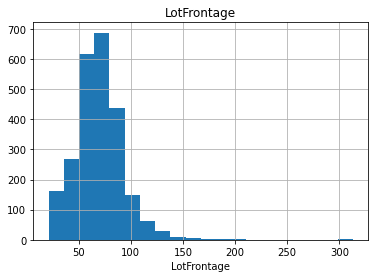

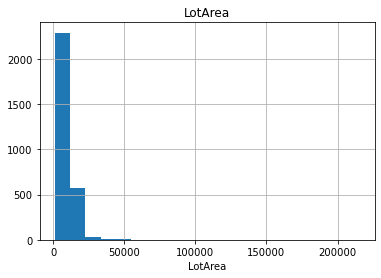

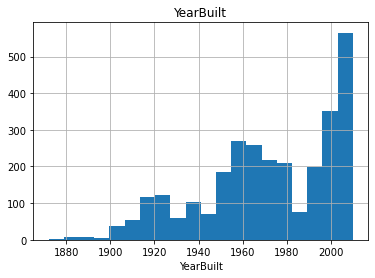

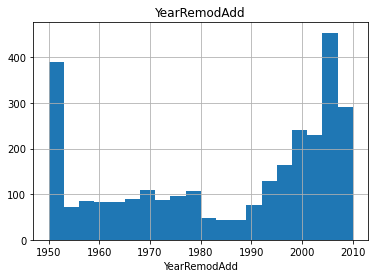

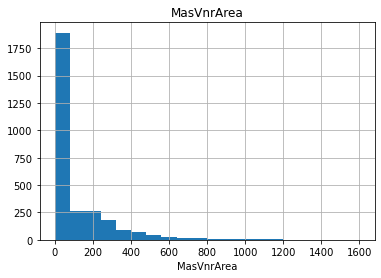

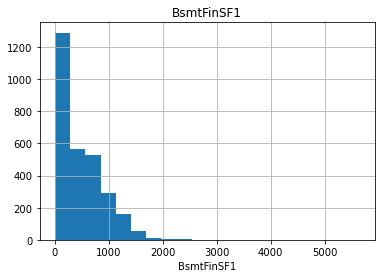

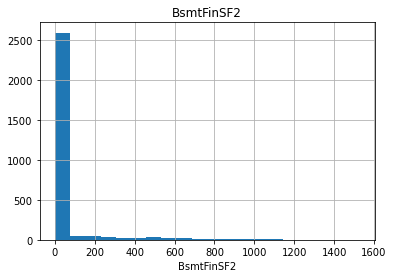

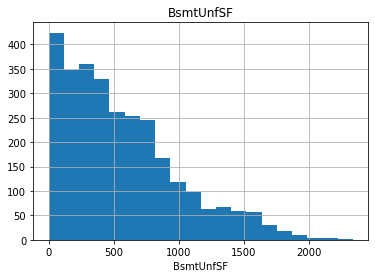

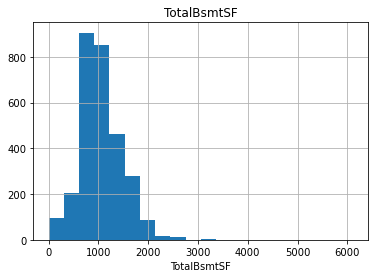

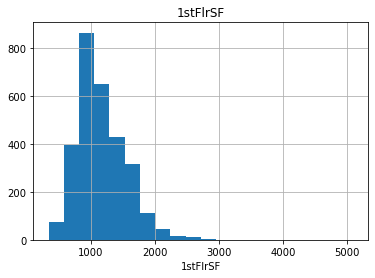

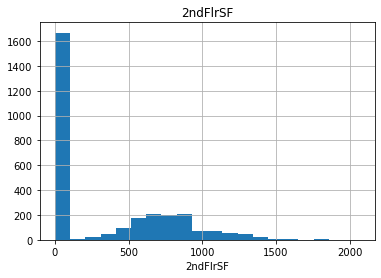

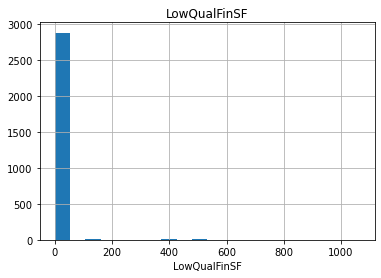

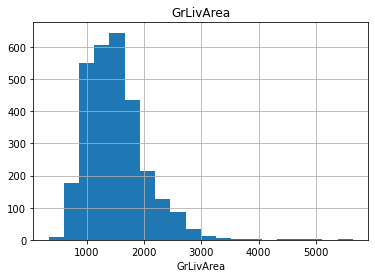

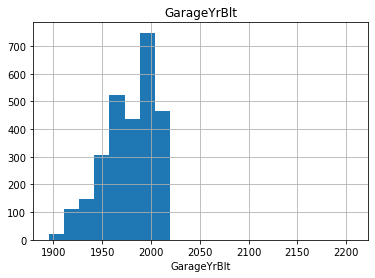

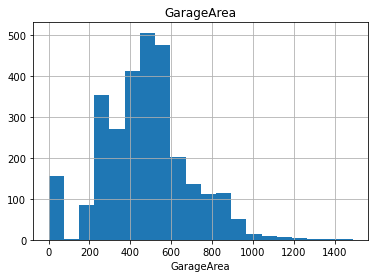

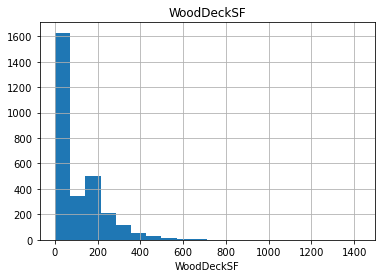

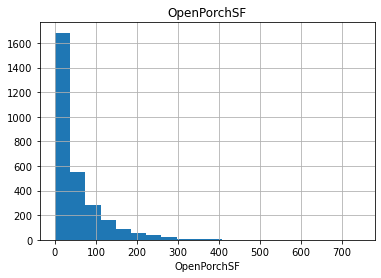

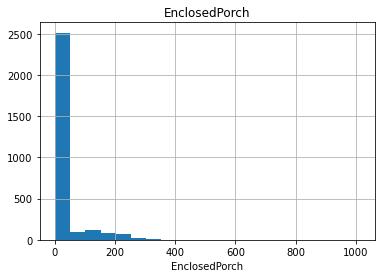

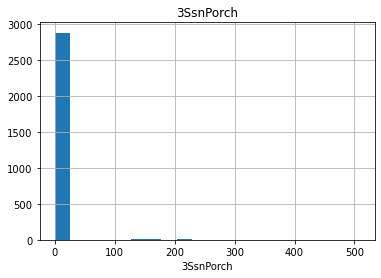

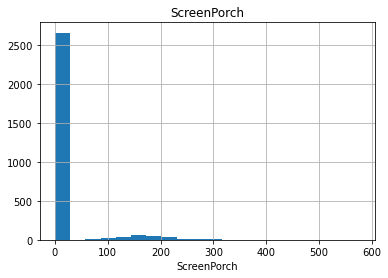

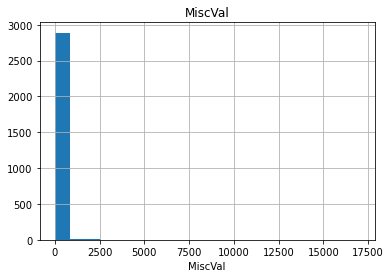

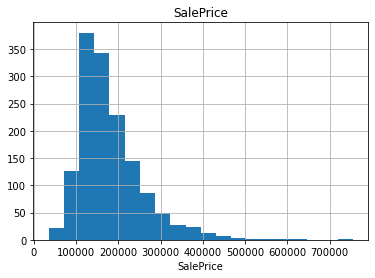

22 variables have been plotted


In [265]:
num_cols=[col for col in df.columns if df[col].dtypes != 'O' and len(df[col].unique())>20 and col not in ["Id","index"]]
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

In [190]:
df.shape

(2919, 82)

## Target Analyse

#### If the dependent variables(Target variable) is a numeric as if SalePrice we need to check corr

In [59]:
# target ile bagımsız degiskenlerin korelasyonları
def find_correlation(dataframe, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "SalePrice":
            pass

        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)


LotFrontage 0.35179909657067854
LotArea 0.2638433538714063
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113867
MasVnrArea 0.4774930470957107
BsmtFinSF1 0.38641980624215627
BsmtFinSF2 -0.011378121450215216
BsmtUnfSF 0.214479105546969
TotalBsmtSF 0.6135805515591944
1stFlrSF 0.6058521846919166
2ndFlrSF 0.31933380283206614
LowQualFinSF -0.02560613000068015
GrLivArea 0.7086244776126511
GarageYrBlt 0.48636167748786213
GarageArea 0.6234314389183598
WoodDeckSF 0.32441344456813076
OpenPorchSF 0.31585622711605577
EnclosedPorch -0.12857795792595636
3SsnPorch 0.04458366533574792
ScreenPorch 0.11144657114291048
MiscVal -0.02118957964030379


In [58]:
high_corrs

['TotalBsmtSF: 0.6135805515591944',
 '1stFlrSF: 0.6058521846919166',
 'GrLivArea: 0.7086244776126511',
 'GarageArea: 0.6234314389183598']

## 3. DATA PREPROCESSING & FEATURE ENGINEERING


In [60]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


### RARE ANALYZER

In [191]:
def rare_analyser_drop(dataframe, target, rare_perc):
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]
    col_counter = 0
    drop_count=[]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")
        if len(dataframe[var].value_counts())<=2:
                    drop_count.append(var)
        col_counter+=1
    print(col_counter, "variables have been plotted")
    print(drop_count, ":", "dropped variables")

In [205]:
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]
    col_counter = 0
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")
        
        col_counter+=1
    print(col_counter, "variables have been plotted")

In [206]:
rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


MSZoning : 5
         COUNT  RATIO  TARGET_MEDIAN
C (all)     25  0.009      74700.000
FV         139  0.048     205950.000
RH          26  0.009     136500.000
RL        2265  0.776     174000.000
RM         460  0.158     120500.000


Street : 2
      COUNT  RATIO  TARGET_MEDIAN
Grvl     12  0.004     114250.000
Pave   2907  0.996     163000.000


LotShape : 4
     COUNT  RATIO  TARGET_MEDIAN
IR1    968  0.332     1

         COUNT  RATIO  TARGET_MEDIAN
2Types      23  0.008     159000.000
Attchd    1723  0.590     185000.000
Basment     36  0.012     148000.000
BuiltIn    186  0.064     227500.000
CarPort     15  0.005     108000.000
Detchd     779  0.267     129500.000


GarageCars : 6
       COUNT  RATIO  TARGET_MEDIAN
0.000    157  0.054     100000.000
1.000    776  0.266     128000.000
2.000   1594  0.546     177750.000
3.000    374  0.128     295000.000
4.000     16  0.005     200000.000
5.000      1  0.000            nan


GarageQual : 5
    COUNT  RATIO  TARGET_MEDIAN
Ex      3  0.001     127500.000
Fa    124  0.042     115000.000
Gd     24  0.008     209115.000
Po      5  0.002      96500.000
TA   2604  0.892     170000.000


GarageCond : 5
    COUNT  RATIO  TARGET_MEDIAN
Ex      3  0.001     124000.000
Fa     74  0.025     114504.000
Gd     15  0.005     148000.000
Po     14  0.005     108000.000
TA   2654  0.909     170000.000


PoolArea : 14
     COUNT  RATIO  TARGET_MEDIAN
0     2906  

In [207]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df


df1 = rare_encoder(df, 0.01)


In [208]:
rare_analyser_drop(df1, "SalePrice", 0.01)


MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


MSZoning : 4
      COUNT  RATIO  TARGET_MEDIAN
FV      139  0.048     205950.000
RL     2265  0.776     174000.000
RM      460  0.158     120500.000
Rare     51  0.017     107500.000


Street : 2
        COUNT  RATIO  TARGET_MEDIAN
Street                             
Pave     2907  0.996     163000.000
Rare       12  0.004     114250.000


LotShape : 4
      COUNT  RATIO  TARGET_MEDIAN
IR1     968  0.332     189000.00

In [209]:
drop_list=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']

In [210]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O'
            and col not in drop_list]

In [211]:
df1.shape

(2919, 82)

In [222]:
def rare_analyser_drop_check(dataframe, target, rare_perc):
    drop_list=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None) and col not in drop_list]
    col_counter = 0
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")
        
        col_counter+=1
    print(col_counter, "variables have been plotted")

In [218]:
for col in drop_list:
    df1.drop(col, axis=1, inplace=True)

In [219]:
df1.shape

(2919, 75)

In [220]:
rare_analyser(df1, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


MSZoning : 4
      COUNT  RATIO  TARGET_MEDIAN
FV      139  0.048     205950.000
RL     2265  0.776     174000.000
RM      460  0.158     120500.000
Rare     51  0.017     107500.000


LotShape : 4
      COUNT  RATIO  TARGET_MEDIAN
IR1     968  0.332     189000.000
IR2      76  0.026     221000.000
Rare     16  0.005     203570.000
Reg    1859  0.637     146000.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEDIAN


## LABEL ENCODING & ONE-HOT ENCODING

In [225]:
def one_hot_encoder(dataframe, category_freq=20, nan_as_category=False):
    categorical_cols = [col for col in dataframe.columns if len(dataframe[col].value_counts()) < category_freq
                        and dataframe[col].dtypes == 'O']

    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)

    return dataframe

In [226]:
df2 = one_hot_encoder(df1)

In [228]:
df2.shape

(2919, 165)

In [227]:
df2.head()

,index,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,65.000,8450,CollgCr,7,5,2003,2003,196.000,706.000,0.000,150.000,856.000,856,854,0,1710,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0,61,0,0,0,0,0,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,80.000,9600,Rare,6,8,1976,1976,0.000,978.000,0.000,284.000,1262.000,1262,0,0,1262,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298,0,0,0,0,0,0,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,68.000,11250,CollgCr,7,5,2001,2002,162.000,486.000,0.000,434.000,920.000,920,866,0,1786,1.000,0.000,2,1,3,1,6,1,2001.000,2.000,608.000,0,42,0,0,0,0,0,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,60.000,9550,Crawfor,7,5,1915,1970,0.000,216.000,0.000,540.000,756.000,961,756,0,1717,1.000,0.000,1,0,3,1,7,1,1998.000,3.000,642.000,0,35,272,0,0,0,0,2,2006,140000.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0

### Missing Values

In [229]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

In [230]:
cols_with_na = missing_values_table(df2)

cols_with_na

              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrArea        23  0.790
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
GarageArea         1  0.030
GarageCars         1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [262]:
df3=df2.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0) #Numericler icin mead,median na doldurma


In [250]:
missing_values_table(df3)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [263]:
df3

,index,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,65.000,8450,CollgCr,7,5,2003,2003,196.000,706.000,0.000,150.000,856.000,856,854,0,1710,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0,61,0,0,0,0,0,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,80.000,9600,Rare,6,8,1976,1976,0.000,978.000,0.000,284.000,1262.000,1262,0,0,1262,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298,0,0,0,0,0,0,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,68.000,11250,CollgCr,7,5,2001,2002,162.000,486.000,0.000,434.000,920.000,920,866,0,1786,1.000,0.000,2,1,3,1,6,1,2001.000,2.000,608.000,0,42,0,0,0,0,0,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,60.000,9550,Crawfor,7,5,1915,1970,0.000,216.000,0.000,540.000,756.000,961,756,0,1717,1.000,0.000,1,0,3,1,7,1,1998.000,3.000,642.000,0,35,272,0,0,0,0,2,2006,140000.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0

In [255]:
df3.isnull().sum().any()

False

In [278]:
# OUTLIERS
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [279]:
num_cols=[col for col in df.columns if df[col].dtypes != 'O' and len(df[col].unique())>20 and col not in ["Id","index","SalePrice"]]
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names



In [274]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [275]:
for col in num_cols:
    replace_with_thresholds(df3, col)


In [281]:
has_outliers(df3, num_cols)


[]

In [282]:
df3.head()

,index,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,65.000,8450.000,CollgCr,7,5,2003.000,2003.000,196.000,706.000,0.000,150.000,856.000,856.000,854.000,0.000,1710.000,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0.000,61.000,0.000,0.000,0.000,0,0.000,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,80.000,9600.000,Rare,6,8,1976.000,1976.000,0.000,978.000,0.000,284.000,1262.000,1262.000,0.000,0.000,1262.000,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298.000,0.000,0.000,0.000,0.000,0,0.000,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,68.000,11250.000,CollgCr,7,5,2001.000,2002.000,162.000,486.000,0.000,434.000,920.000,920.000,866.000,0.000,1786.000,1.000,0.000,2,1,3,1,6,1,2001.000,2.000,608.000,0.000,42.000,0.000,0.000,0.000,0,0.000,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,60.000,9550.000,Crawfor,7,5,1915.000,1970.000,0.000,216.000,0.000,540.000,756.000,961.000,756.000,0.000,1717.000,1.000,0.000,1,0,3,1,7

In [283]:
df3.drop("Neighborhood", axis=1, inplace=True)

In [286]:
df3.head()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,65.000,8450.000,7,5,2003.000,2003.000,196.000,706.000,0.000,150.000,856.000,856.000,854.000,0.000,1710.000,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0.000,61.000,0.000,0.000,0.000,0,0.000,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,80.000,9600.000,6,8,1976.000,1976.000,0.000,978.000,0.000,284.000,1262.000,1262.000,0.000,0.000,1262.000,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298.000,0.000,0.000,0.000,0.000,0,0.000,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,68.000,11250.000,7,5,2001.000,2002.000,162.000,486.000,0.000,434.000,920.000,920.000,866.000,0.000,1786.000,1.000,0.000,2,1,3,1,6,1,2001.000,2.000,608.000,0.000,42.000,0.000,0.000,0.000,0,0.000,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,60.000,9550.000,7,5,1915.000,1970.000,0.000,216.000,0.000,540.000,756.000,961.000,756.000,0.000,1717.000,1.000,0.000,1,0,3,1,7,1,1998.000,3.000,642.000,0.000,35.000,272

In [287]:
df3.shape

(2919, 164)

## STANDARTLASTIRMA

In [297]:
like_num = [col for col in df3.columns if df3[col].dtypes != 'O' and len(df3[col].value_counts()) < 20]
categorical_cols = [col for col in df3.columns if len(df3[col].value_counts()) < 20
                        and df3[col].dtypes == 'O']
cols_need_scale = [col for col in df3.columns if col not in categorical_cols
                   and col not in "Id"
                   and col not in "index"
                   and col not in "SalePrice"
                   and col not in like_num]

In [298]:
df3[cols_need_scale].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.000,8450.000,2003.000,2003.000,196.000,706.000,0.000,150.000,856.000,856.000,854.000,1710.000,2003.000,548.000,0.000,61.000,0.000,0.000
1,80.000,9600.000,1976.000,1976.000,0.000,978.000,0.000,284.000,1262.000,1262.000,0.000,1262.000,1976.000,460.000,298.000,0.000,0.000,0.000
2,68.000,11250.000,2001.000,2002.000,162.000,486.000,0.000,434.000,920.000,920.000,866.000,1786.000,2001.000,608.000,0.000,42.000,0.000,0.000
3,60.000,9550.000,1915.000,1970.000,0.000,216.000,0.000,540.000,756.000,961.000,756.000,1717.000,1998.000,642.000,0.000,35.000,272.000,0.000
4,84.000,14260.000,2000.000,2000.000,350.000,655.000,0.000,490.000,1145.000,1145.000,1053.000,2198.000,2000.000,836.000,192.000,84.000,0.000,0.000


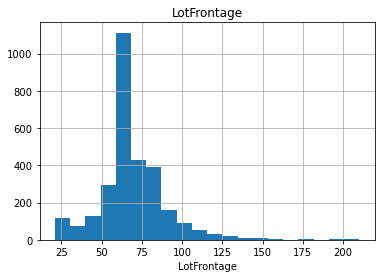

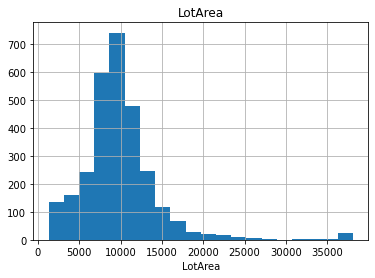

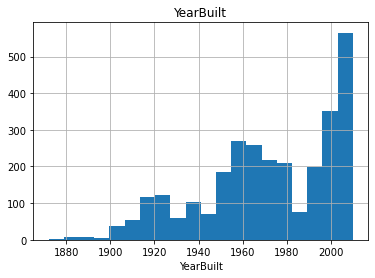

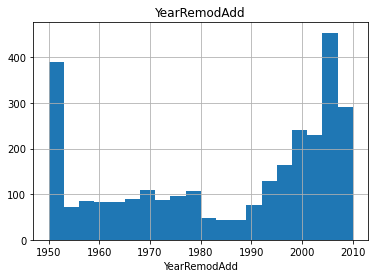

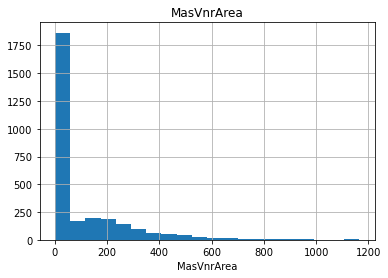

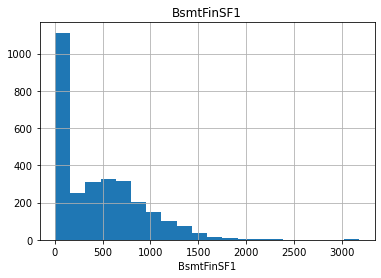

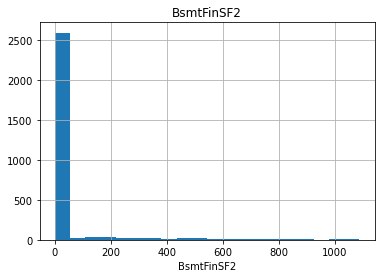

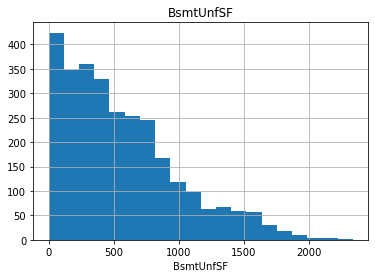

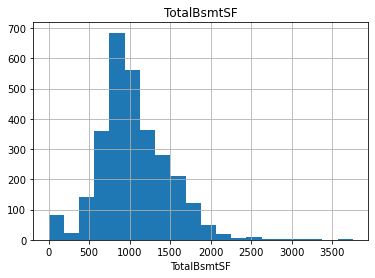

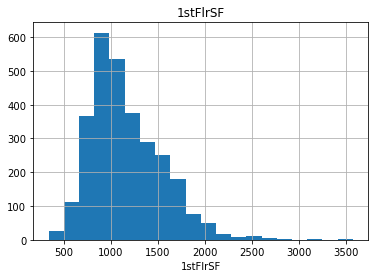

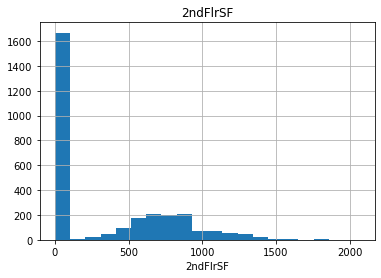

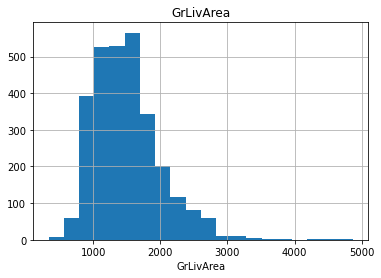

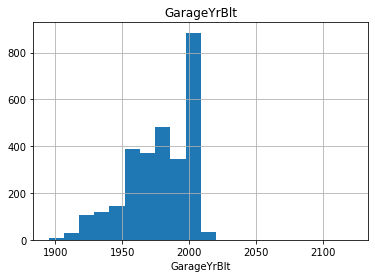

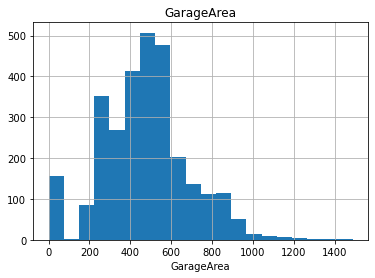

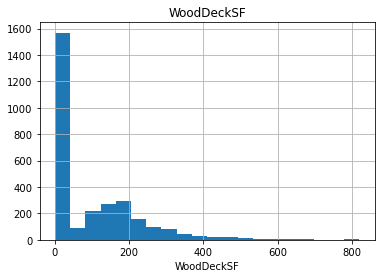

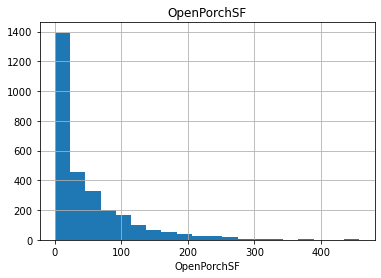

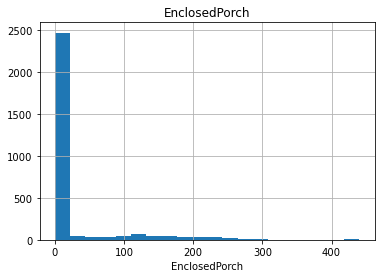

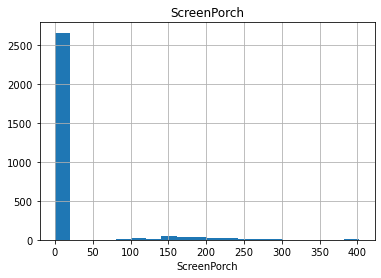

18 variables have been plotted


In [299]:
hist_for_nums(df3, cols_need_scale)

### robust_scaler fonksiyonu mediana gore standartlastirdigi icin (xi-median)/range(q3-q1) den payda 0 oldugundaki durumdan kurtulmak icin yazilmistir

In [300]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [301]:
for col in cols_need_scale:
    df3[col] = robust_scaler(df3[col])

In [303]:
df3[cols_need_scale].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-0.167,-0.245,0.632,0.256,1.199,0.460,0.000,-0.542,-0.262,-0.442,1.213,0.431,0.608,0.266,0.000,0.500,0.000,0.000
1,0.667,0.036,0.063,-0.436,0.000,0.832,0.000,-0.313,0.535,0.352,0.000,-0.295,-0.076,-0.078,1.774,-0.371,0.000,0.000
2,0.000,0.439,0.589,0.231,0.991,0.160,0.000,-0.056,-0.137,-0.317,1.230,0.554,0.557,0.500,0.000,0.229,0.000,0.000
3,-0.444,0.024,-1.221,-0.590,0.000,-0.208,0.000,0.125,-0.459,-0.237,1.074,0.442,0.481,0.633,0.000,0.129,1.545,0.000
4,0.889,1.175,0.568,0.179,2.141,0.391,0.000,0.039,0.306,0.123,1.496,1.221,0.532,1.391,1.143,0.829,0.000,0.000


In [304]:
df3[cols_need_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.000,0.057,1.148,-2.611,-0.444,0.000,0.556,7.889
LotArea,2919.000,0.114,1.185,-1.992,-0.482,0.000,0.518,6.997
YearBuilt,2919.000,-0.035,0.638,-2.126,-0.410,0.000,0.589,0.779
YearRemodAdd,2919.000,-0.224,0.536,-1.103,-0.718,0.000,0.282,0.436
MasVnrArea,2919.000,0.618,1.081,0.000,0.000,0.000,1.000,7.125
BsmtFinSF1,2919.000,0.098,0.609,-0.503,-0.503,0.000,0.497,3.842
BsmtFinSF2,2919.000,0.113,0.382,0.000,0.000,0.000,0.000,2.500
BsmtUnfSF,2919.000,0.160,0.751,-0.798,-0.422,0.000,0.577,3.195
TotalBsmtSF,2919.000,0.120,0.845,-1.944,-0.386,0.000,0.614,5.437
1stFlrSF,2919.000,0.150,0.752,-1.462,-0.403,0.000,0.597,4.877


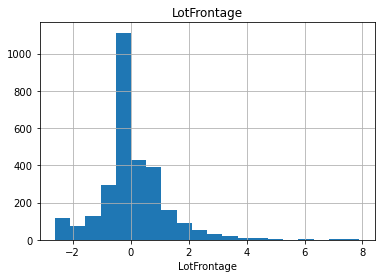

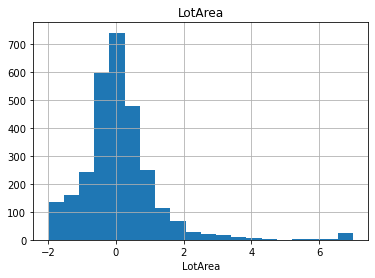

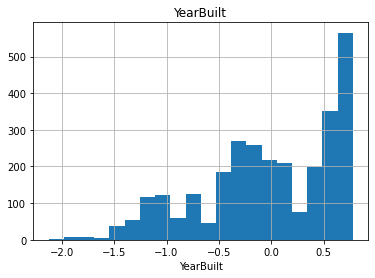

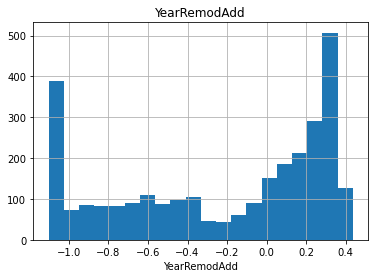

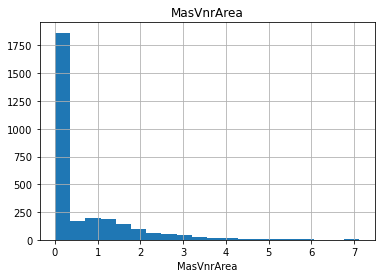

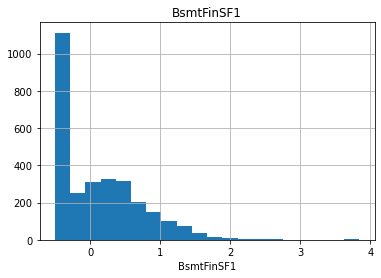

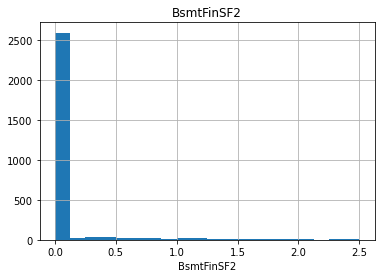

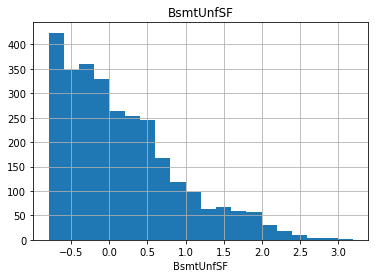

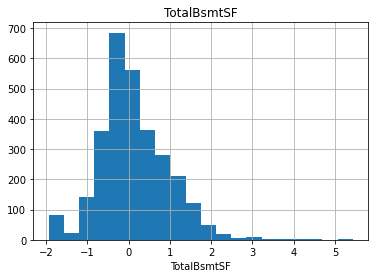

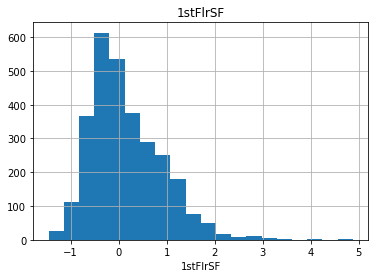

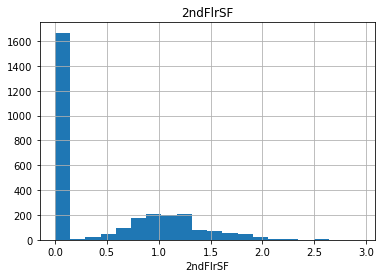

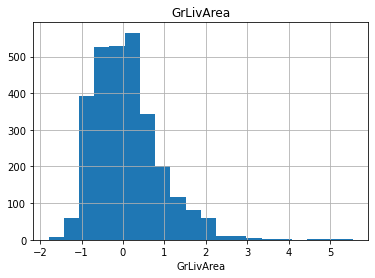

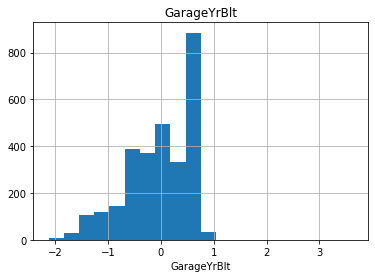

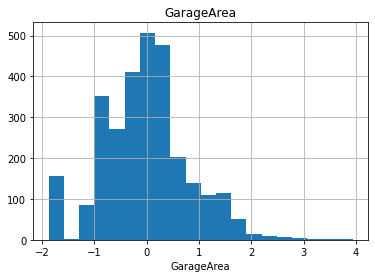

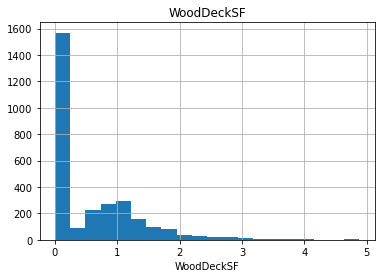

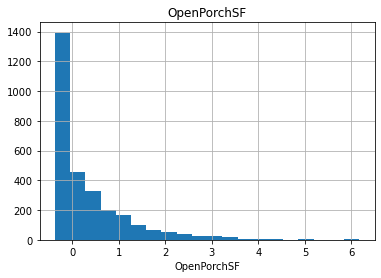

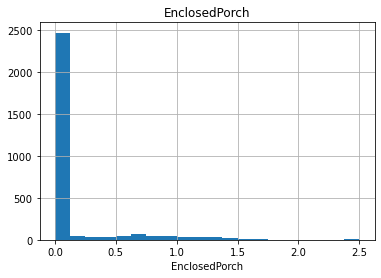

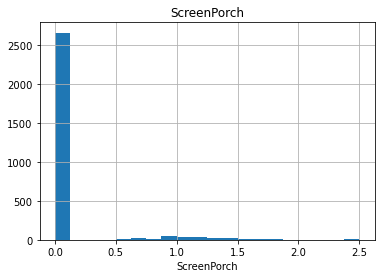

18 variables have been plotted


In [305]:
hist_for_nums(df3, cols_need_scale)

In [308]:
# son kontrol
missing_values_table(df3)


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [309]:
has_outliers(df3, num_cols)

TotalBsmtSF : 2
1stFlrSF : 3
GrLivArea : 2
WoodDeckSF : 3
OpenPorchSF : 6


['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

## 4. MODELLEME

In [311]:
df3

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,-0.167,-0.245,7,5,0.632,0.256,1.199,0.460,0.000,-0.542,-0.262,-0.442,1.213,0.000,0.431,1.000,0.000,2,1,3,1,8,0,0.608,2.000,0.266,0.000,0.500,0.000,0.000,0.000,0,0.000,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,0.667,0.036,6,8,0.063,-0.436,0.000,0.832,0.000,-0.313,0.535,0.352,0.000,0.000,-0.295,0.000,1.000,2,0,3,1,6,1,-0.076,2.000,-0.078,1.774,-0.371,0.000,0.000,0.000,0,0.000,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,0.000,0.439,7,5,0.589,0.231,0.991,0.160,0.000,-0.056,-0.137,-0.317,1.230,0.000,0.554,1.000,0.000,2,1,3,1,6,1,0.557,2.000,0.500,0.000,0.229,0.000,0.000,0.000,0,0.000,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,-0.444,0.024,7,5,-1.221,-0.590,0.000,-0.208,0.000,0.125,-0.459,-0.237,1.074,0.000,0.442,1.000,0.000,1,0,3,1,7,1,0.481,3.000,0.633,0.000,0.129,1.545,0.000,0.000,0,0.000,2,2006,140000.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0

In [319]:
train_df=df3[df3["Id"]<1461]

In [348]:
train_df

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,0,1,60,-0.167,-0.245,7,5,0.632,0.256,1.199,0.460,0.000,-0.542,-0.262,-0.442,1.213,0.000,0.431,1.000,0.000,2,1,3,1,8,0,0.608,2.000,0.266,0.000,0.500,0.000,0.000,0.000,0,0.000,2,2008,208500.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,1,2,20,0.667,0.036,6,8,0.063,-0.436,0.000,0.832,0.000,-0.313,0.535,0.352,0.000,0.000,-0.295,0.000,1.000,2,0,3,1,6,1,-0.076,2.000,-0.078,1.774,-0.371,0.000,0.000,0.000,0,0.000,5,2007,181500.000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,2,3,60,0.000,0.439,7,5,0.589,0.231,0.991,0.160,0.000,-0.056,-0.137,-0.317,1.230,0.000,0.554,1.000,0.000,2,1,3,1,6,1,0.557,2.000,0.500,0.000,0.229,0.000,0.000,0.000,0,0.000,9,2008,223500.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,3,4,70,-0.444,0.024,7,5,-1.221,-0.590,0.000,-0.208,0.000,0.125,-0.459,-0.237,1.074,0.000,0.442,1.000,0.000,1,0,3,1,7,1,0.481,3.000,0.633,0.000,0.129,1.545,0.000,0.000,0,0.000,2,2006,140000.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0

In [317]:
test_df=df3[df3["Id"]>1460]

In [349]:
test_df

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
1460,0,1461,20,0.667,0.530,5,6,-0.253,-0.821,0.000,0.136,0.331,-0.337,-0.211,-0.364,0.000,0.000,-0.887,0.000,0.000,1,0,2,1,5,0,-0.456,1.000,0.977,0.833,-0.371,0.000,0.000,0.745,0,0.000,6,2010,NaN,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1461,1,1462,20,0.722,1.176,6,6,-0.316,-0.897,0.661,0.756,0.000,-0.104,0.667,0.483,0.000,0.000,-0.186,0.000,0.000,1,1,3,1,6,0,-0.532,1.000,-0.656,2.339,0.143,0.000,0.000,0.000,0,0.000,6,2010,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1462,2,1463,60,0.333,1.070,5,5,0.505,0.128,0.000,0.576,0.000,-0.564,-0.121,-0.301,0.996,0.000,0.300,0.000,0.000,2,1,3,1,6,1,0.456,2.000,0.008,1.262,0.114,0.000,0.000,0.000,0,0.000,3,2010,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1463,3,1464,60,0.556,0.128,6,6,0.526,0.128,0.122,0.319,0.000,-0.244,-0.125,-0.305,0.963,0.000,0.259,0.000,0.000,2,1,3,1,7,1,0.481,2.000,-0.039,2.143,0.143,0.000,0.000,0.000,0,0.000,6,2010,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [329]:
test_df.shape

(1459, 164)

In [350]:
# train_df tüm veri setimiz gibi davranarak derste ele aldığımız şekilde modelelme işlemini gerçekleştiriniz.
X = train_df.drop('SalePrice', axis=1)
y = train_df[["SalePrice"]]

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [352]:
models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet())]


In [353]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

df3["SalePrice"].mean()

LinearRegression: 104962.957007
Ridge: 28304.436973
Lasso: 28906.222181
ElasticNet: 31755.137502


171963.6676944159

In [355]:
df4=df3.to_csv("EDA_house_price.csv")